In [1]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import seaborn as sns
from mne_connectivity import spectral_connectivity_epochs

from shared.helper_functions import *
from resting_state.settings import *
from settings_general import low_qual_chans, freq_bands_eeg

Change plot theme

In [2]:
sns.set_theme()

Define palette

In [6]:
palette_light = {'DRD2-WT': '#419D78', 'DRD2-KO': '#EB5E55'}

Let's load some general needed information

In [4]:
epoch_folder = select_folder("Select the folder that holds epoch files (starting with 'epochs_w_cluster_annotations')")
plot_folder = select_or_create_folder("Create or select a folder the plots will be saved to")

To inspect only the Default Mode Network, we only can exclude the Somatosensory and Visual cortex as well as of course the EMGs if we want to.

In [38]:
emg_chans = ['EMG_L', 'EMG_R']
skull_chans = ['S1_L', 'S1_R', 'V1_R']

## Let's load all needed epochs

In [39]:
all_subject_epochs = []
for file in os.listdir(epoch_folder):
    subj_id = file.split('_')[-1].split('-')[0]
    if not file.startswith('epochs_w_cluster_annotations') or int(subj_id) in omitted_after_clustering or int(
            subj_id) in omitted_other:
        continue
    all_subject_epochs.append(mne.read_epochs(os.path.join(epoch_folder, file), preload=True, verbose='WARNING'))

## First, we use all EEG channels

Compute the multivariate connectivity measures for all subject's epochs

We first include all EEG channels, so also the skull electrodes. We will omit the subjects that were omitted from power and connectivity analyses here as well.

In [40]:
results_df_all = pd.DataFrame()

# for each subject, get the resting/active/sleep epochs, drop the emg channels and calculate the mic and mim
for subj_epochs in all_subject_epochs:
    subject_id = int(subj_epochs.metadata['animal_id'].iloc[0])
    if subject_id in [81217, 79604, 81193, 39489]:
        print(f'Skipping subject {subject_id} as its quality was not sufficient (determined in power/connectivity notebooks)')
        continue
        
    annotations = cluster_annotations[subject_id]
    genotype = subj_epochs.metadata['genotype'].iloc[0]
    to_drop = [x for x in ['EMG_L', 'EMG_R'] if x in subj_epochs.info['ch_names']]
    subj_epochs = subj_epochs.load_data().drop_channels(to_drop)
    
    for label, index in annotations.items():
        state_epochs = subj_epochs[subj_epochs.metadata["cluster"] == index]

        (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
    
        results_df_all = pd.concat([results_df_all, pd.DataFrame({
            'animal_id' : subject_id,
            'genotype' : genotype,
            'state': label,
            'freqs' : mic.freqs,
            'mic' : mic.get_data()[0,:],
            'mim' : mim.get_data()[0,:]
        })])

Skipping subject 39489 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectr

Skipping subject 79604 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectr

Skipping subject 81193 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectr

Skipping subject 81217 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\1203172650.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectr

### Maximized Imaginary part of Coherency

Let's quickly compare the different states

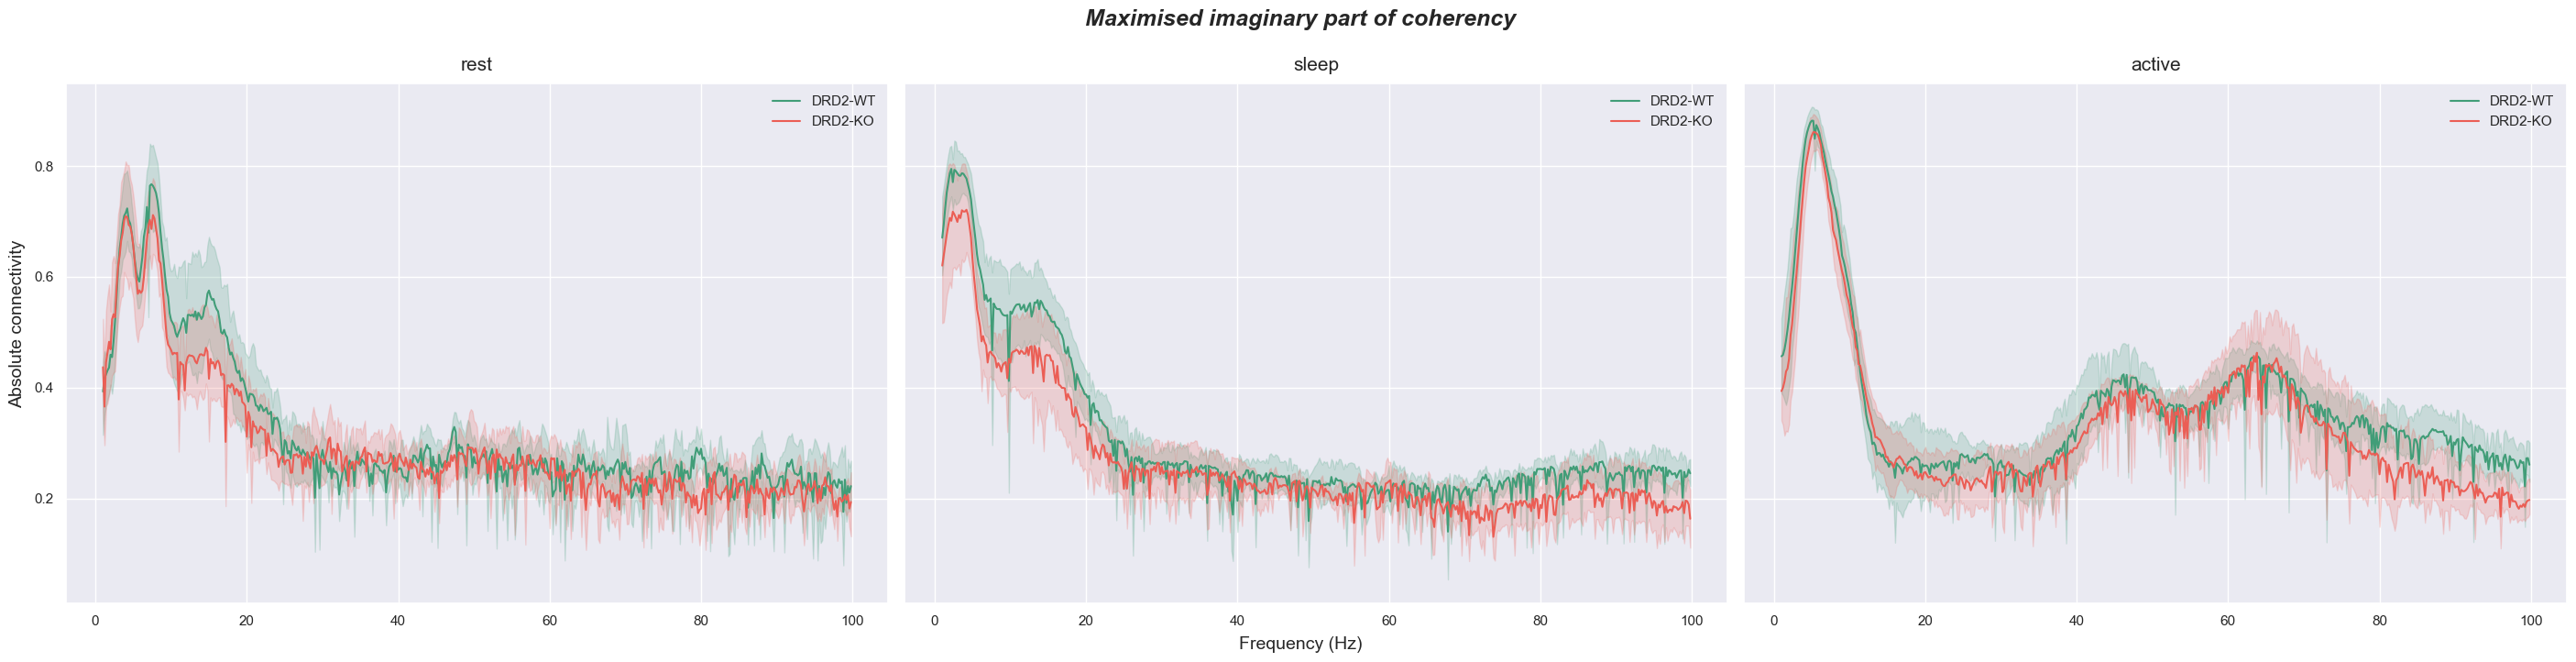

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(28, 7), sharey=True, sharex=True)
axs = axs.ravel()

for i, state in enumerate(results_df_all.state.unique()):
    state_data = results_df_all[results_df_all.state == state]
    
    sns.lineplot(x=state_data.freqs, y=np.abs(state_data.mic), hue=state_data.genotype, palette=palette_light, errorbar=('ci', 95), ax=axs[i])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(state, fontsize=15, y=1.01)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'Absolute connectivity', ha='center', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Maximised imaginary part of coherency", fontsize=18, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/MIC_per_behaviour.pdf"))

#### Let's zoom in on the resting-state epochs

Let's look at the difference between the genotypes in the different bands

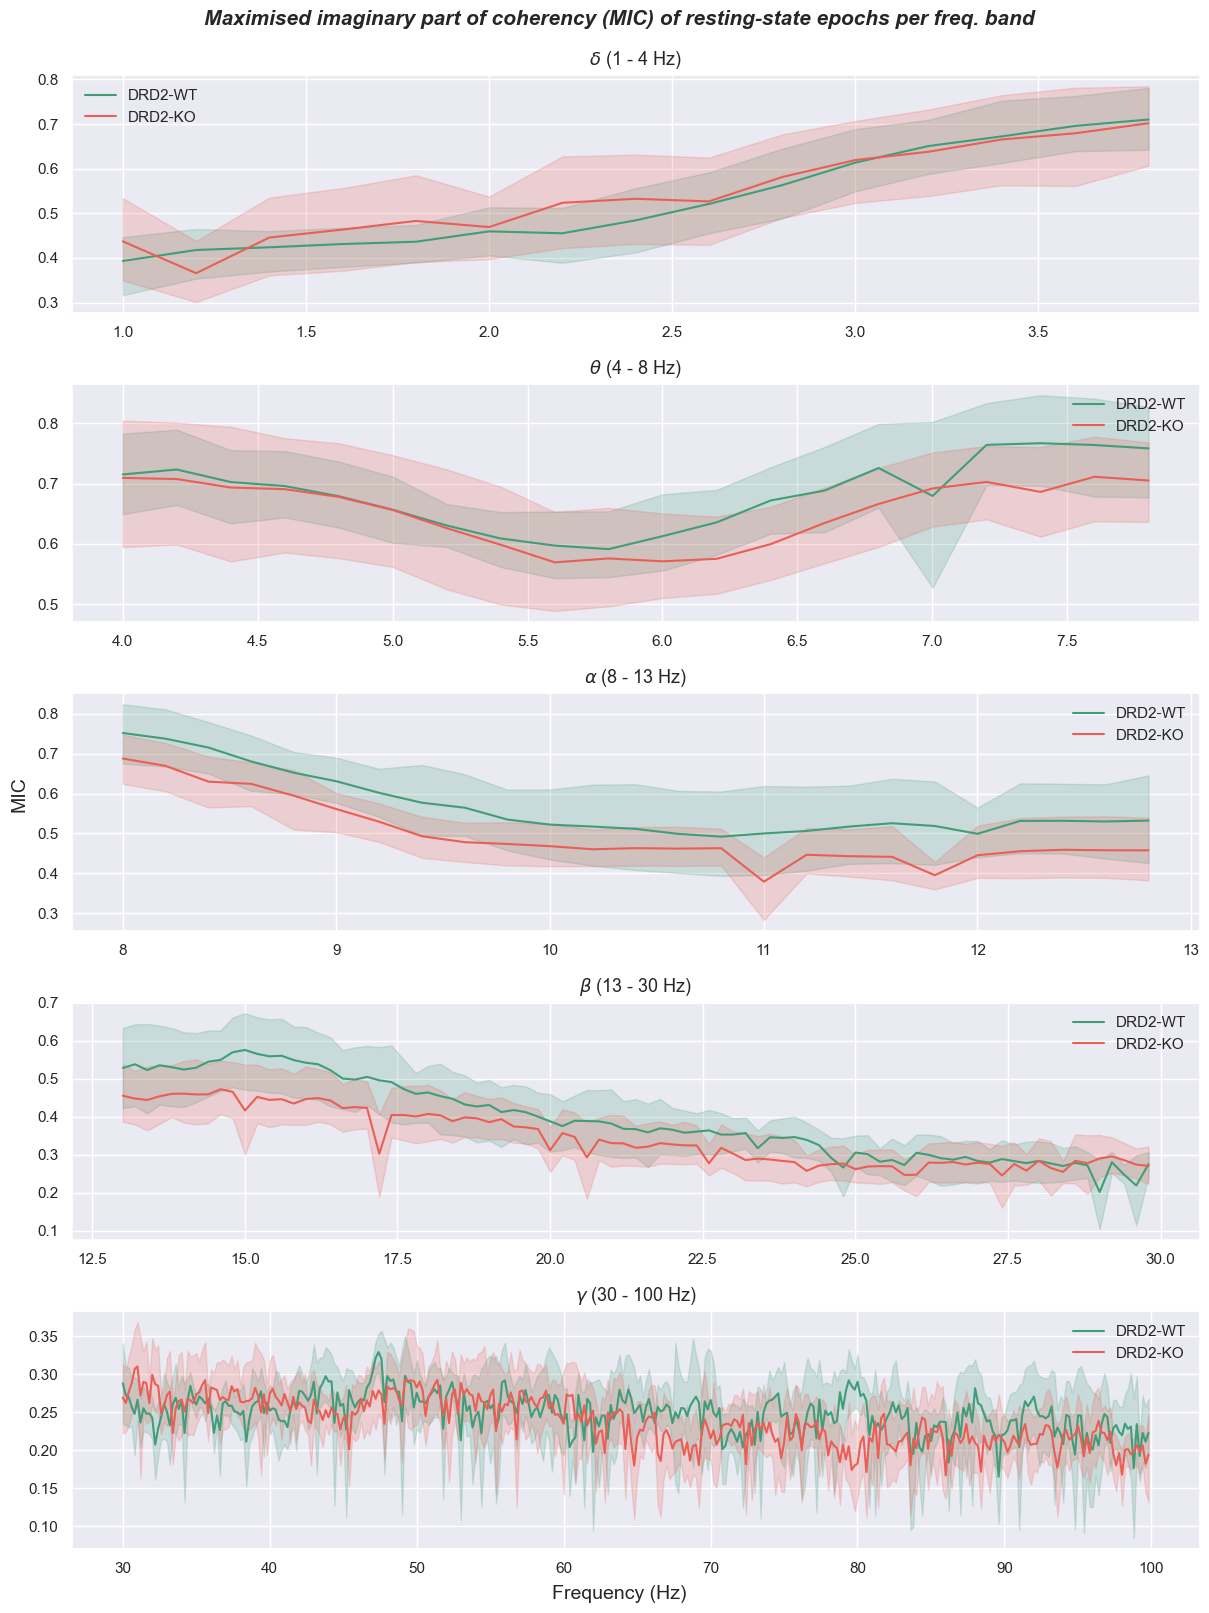

In [42]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 16))
axs = axs.ravel()

for i, (band, (start, end)) in enumerate(freq_bands_eeg.items()):
    rest_data = results_df_all[results_df_all.state == 'rest']
    slice_data = rest_data[(rest_data.freqs >= start) & (rest_data.freqs <= end)]
    sns.lineplot(x=slice_data.freqs, y=np.abs(slice_data.mic), hue=slice_data.genotype, errorbar=('ci', 95), ax=axs[i], palette=palette_light)
    axs[i].set_title(f"{band} ({start} - {end} Hz)", fontsize=13, y=1.01)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'MIC', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle('Maximised imaginary part of coherency (MIC) of resting-state epochs per freq. band', fontsize=15, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/multivar_MIC_all_eeg_chans.pdf"))

### Multivariate Interaction Measure (MIM)

Let's quickly compare the different states

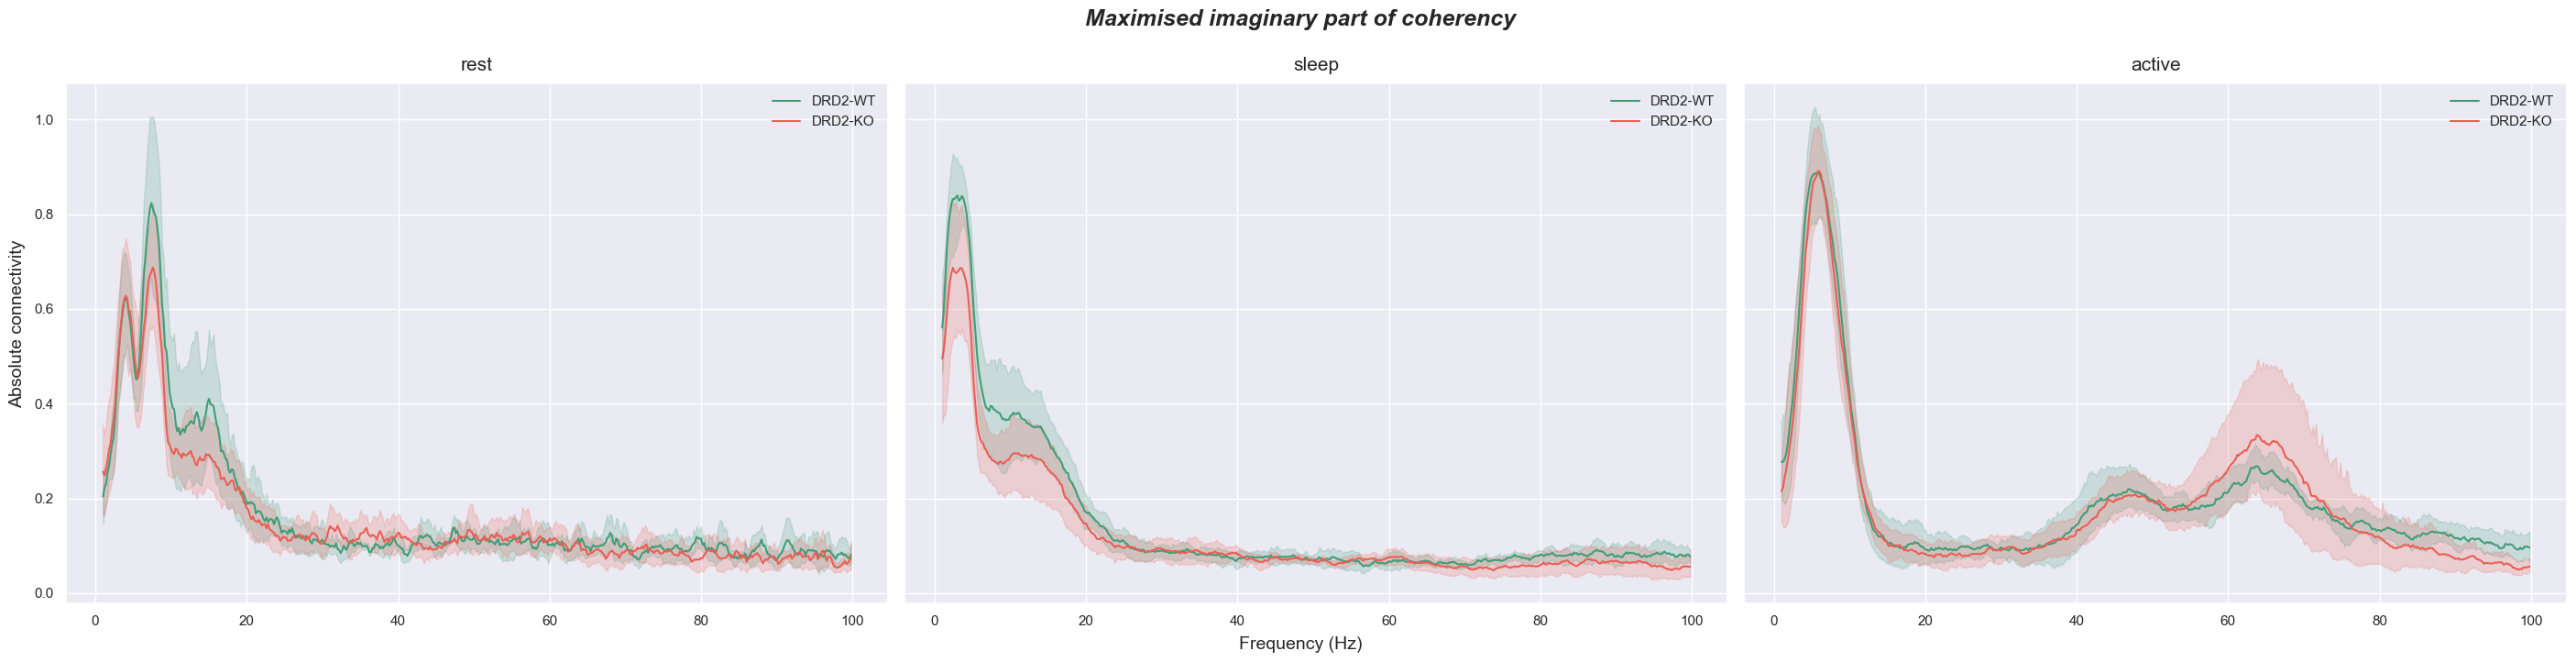

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(28, 7), sharey=True, sharex=True)
axs = axs.ravel()

for i, state in enumerate(results_df_all.state.unique()):
    state_data = results_df_all[results_df_all.state == state]
    
    sns.lineplot(state_data, x='freqs', y='mim', hue='genotype', errorbar=('ci', 95), ax=axs[i], palette=palette_light)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(state, fontsize=15, y=1.01)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'Absolute connectivity', ha='center', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Maximised imaginary part of coherency", fontsize=18, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/MIM_per_behaviour.pdf"))

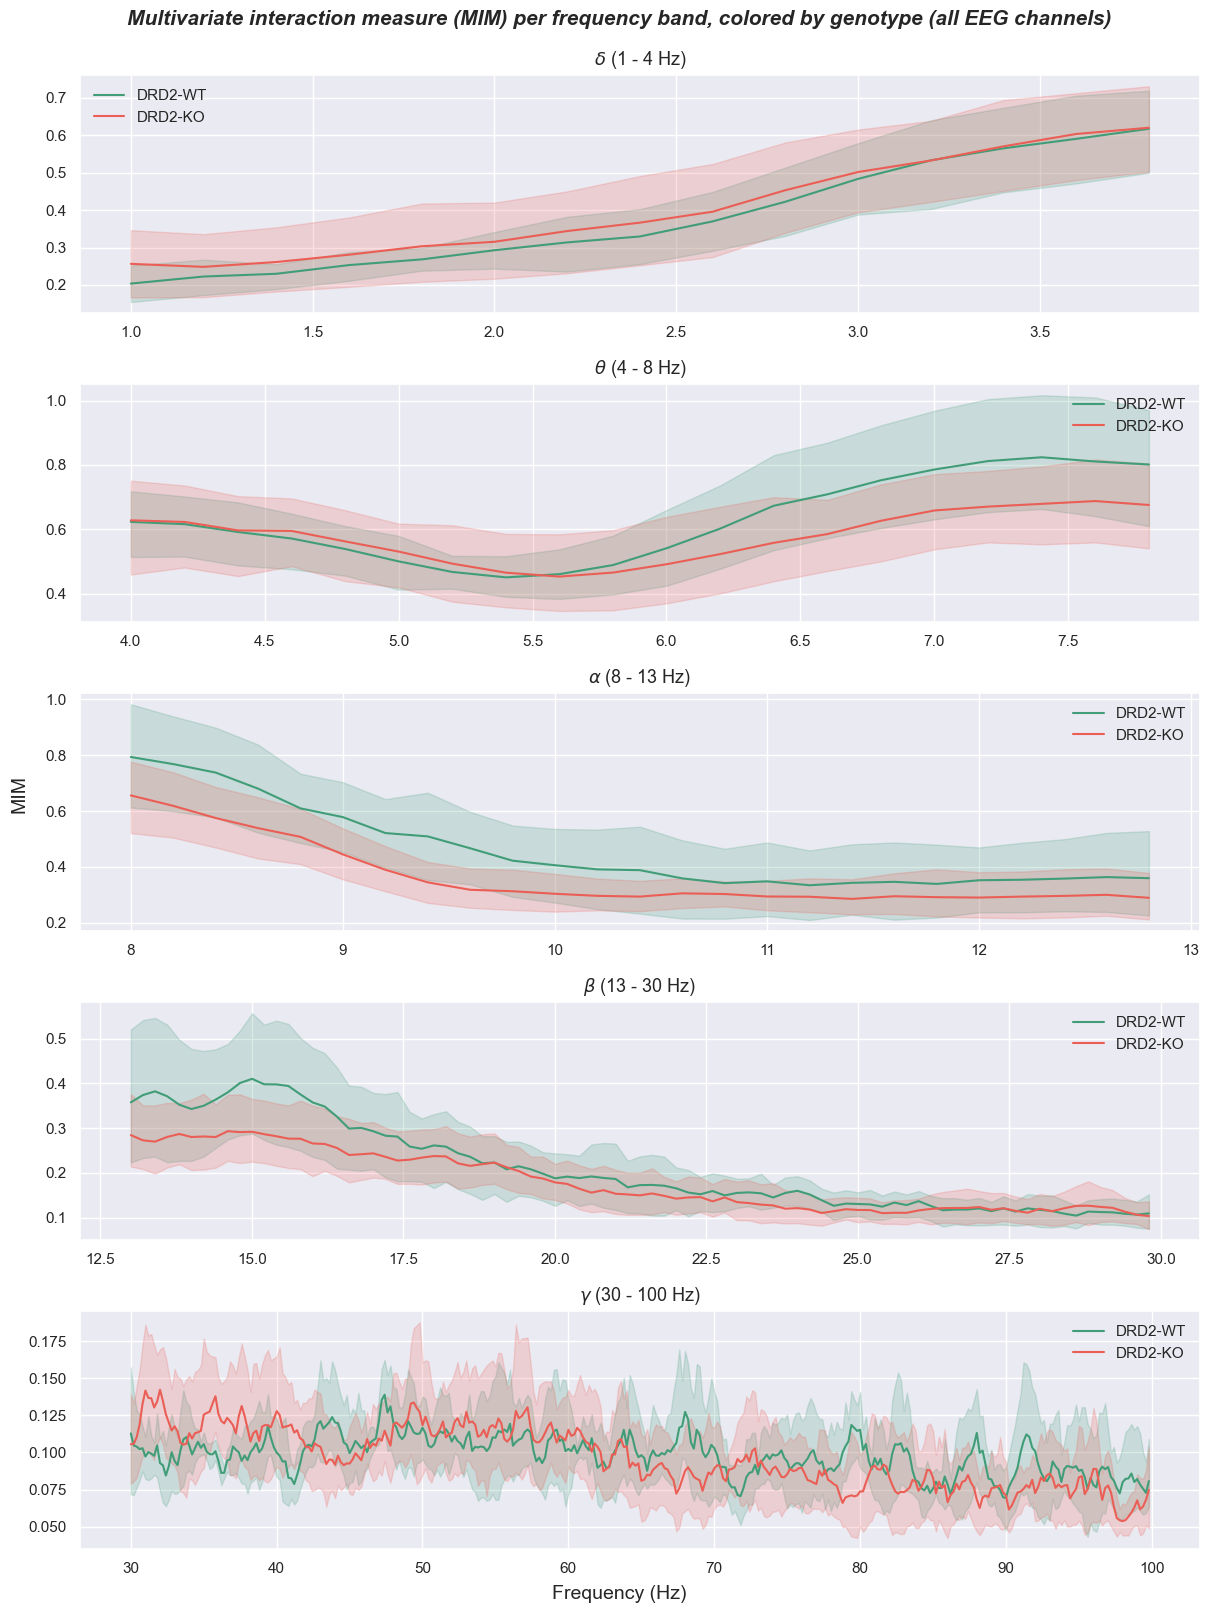

In [44]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 16))
axs = axs.ravel()

for i, (band, (start, end)) in enumerate(freq_bands_eeg.items()):
    rest_data = results_df_all[results_df_all.state == 'rest']
    slice_data = rest_data[(rest_data.freqs >= start) & (rest_data.freqs <= end)]
    sns.lineplot(slice_data, x='freqs', y='mim', hue='genotype', errorbar=('ci', 95), ax=axs[i], palette=palette_light)
    axs[i].set_title(f"{band} ({start} - {end} Hz)", fontsize=13, y=1.01)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'MIM', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle('Multivariate interaction measure (MIM) per frequency band, colored by genotype (all EEG channels)', fontsize=15, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/multivar_MIM_all_eeg_chans.pdf"))

## Now we do the same, but using only the depth electrodes

In [45]:
results_df_dmn = pd.DataFrame()

# for each subject, get the resting/active/sleep epochs, drop the emg channels and calculate the mic and mim
for subj_epochs in all_subject_epochs:
    subject_id = int(subj_epochs.metadata['animal_id'].iloc[0])
    if subject_id in [81217, 79604, 81193, 39489]:
        print(f'Skipping subject {subject_id} as its quality was not sufficient (determined in power/connectivity notebooks)')
        continue
        
    annotations = cluster_annotations[subject_id]
    genotype = subj_epochs.metadata['genotype'].iloc[0]
    to_drop = [x for x in ['EMG_L', 'EMG_R', 'S1_L', 'S1_R', 'V1_R'] if x in subj_epochs.info['ch_names']]
    subj_epochs = subj_epochs.load_data().drop_channels(to_drop)
    
    for label, index in annotations.items():
        state_epochs = subj_epochs[subj_epochs.metadata["cluster"] == index]

        (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
    
        results_df_dmn = pd.concat([results_df_dmn, pd.DataFrame({
            'animal_id' : subject_id,
            'genotype' : genotype,
            'state': label,
            'freqs' : mic.freqs,
            'mic' : mic.get_data()[0,:],
            'mim' : mim.get_data()[0,:]
        })])

Skipping subject 39489 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum 

Skipping subject 79604 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum 

Skipping subject 81193 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum 

Skipping subject 81217 as its quality was not sufficient (determined in power/connectivity notebooks)


C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum estimate will be unreliable.
  (mic, mim) = spectral_connectivity_epochs(state_epochs, method=['mic', 'mim'], n_jobs=-1, fmin=1, fmax=100, verbose='WARNING')
C:\Users\Olle de Jong\AppData\Local\Temp\ipykernel_17640\813534278.py:18: RuntimeWarning: fmin=1.000 Hz corresponds to 4.999 < 5 cycles based on the epoch length 4.999 sec, need at least 5.000 sec epochs or fmin=1.000. Spectrum 

### Maximized Imaginary part of Coherency

Let's quickly compare the different states

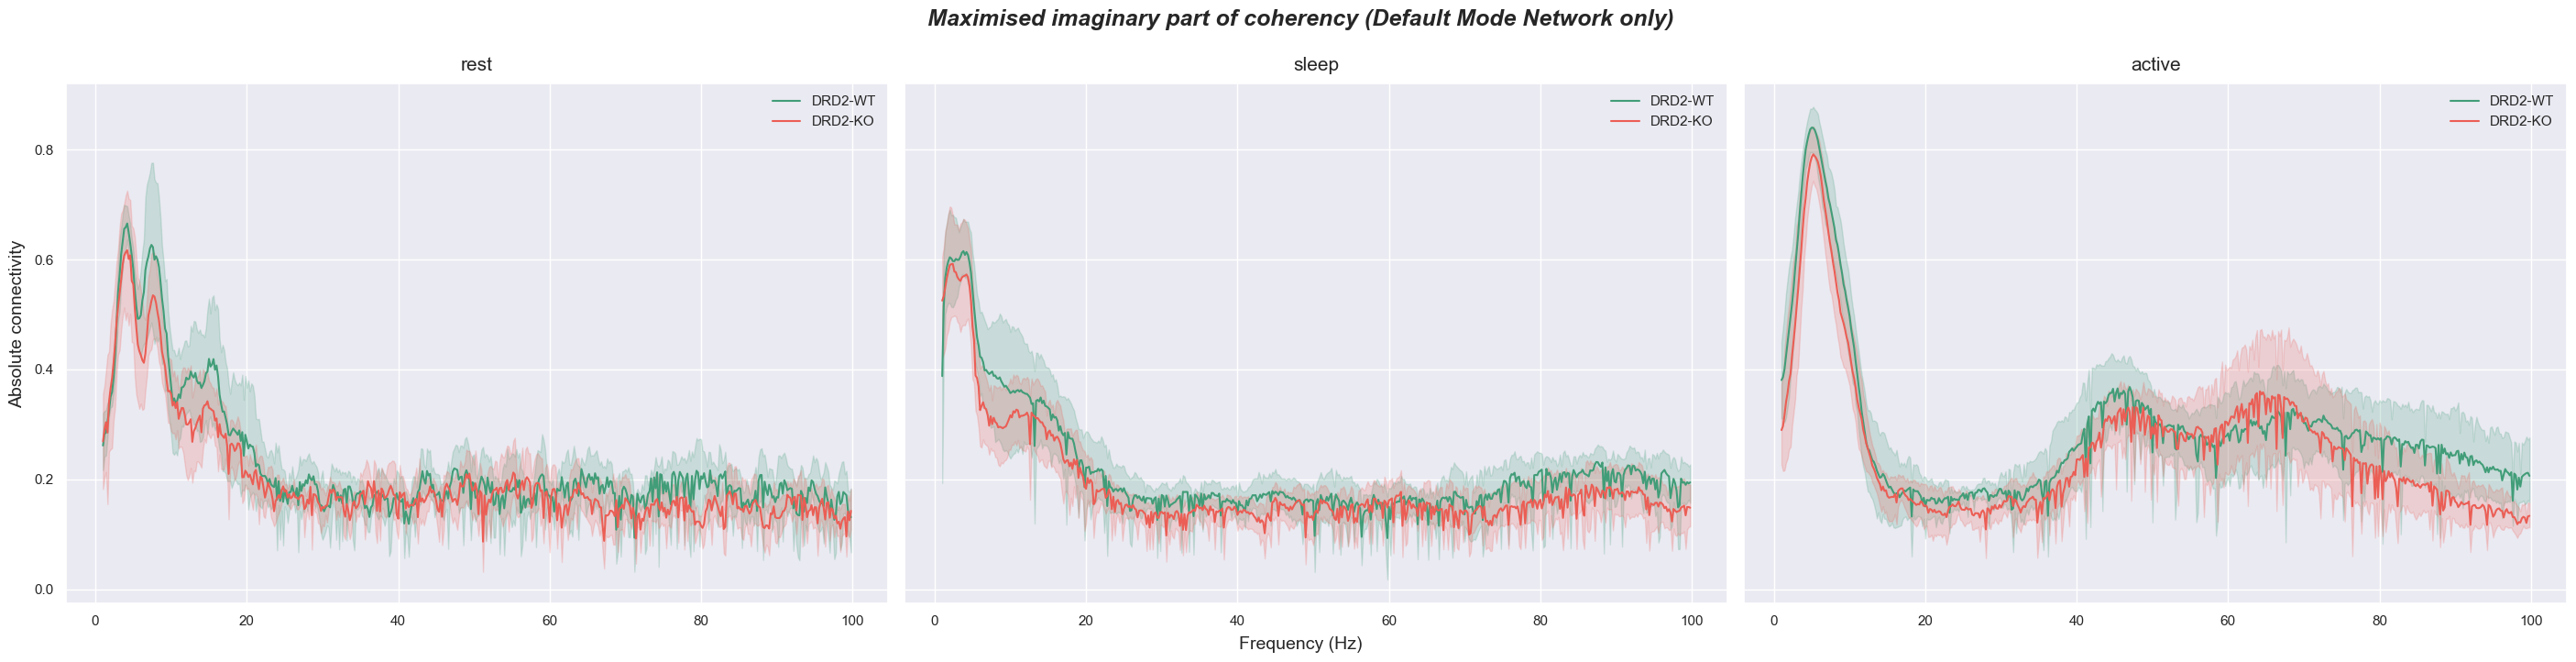

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(28, 7), sharey=True, sharex=True)
axs = axs.ravel()

for i, state in enumerate(results_df_dmn.state.unique()):
    state_data = results_df_dmn[results_df_dmn.state == state]
    
    sns.lineplot(x=state_data.freqs, y=np.abs(state_data.mic), hue=state_data.genotype, palette=palette_light, errorbar=('ci', 95), ax=axs[i])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(state, fontsize=15, y=1.01)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'Absolute connectivity', ha='center', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Maximised imaginary part of coherency (Default Mode Network only)", fontsize=18, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/MIC_DMN_per_behaviour.pdf"))

#### Let's zoom in on the resting-state epochs

Let's look at the difference between the genotypes in the different bands

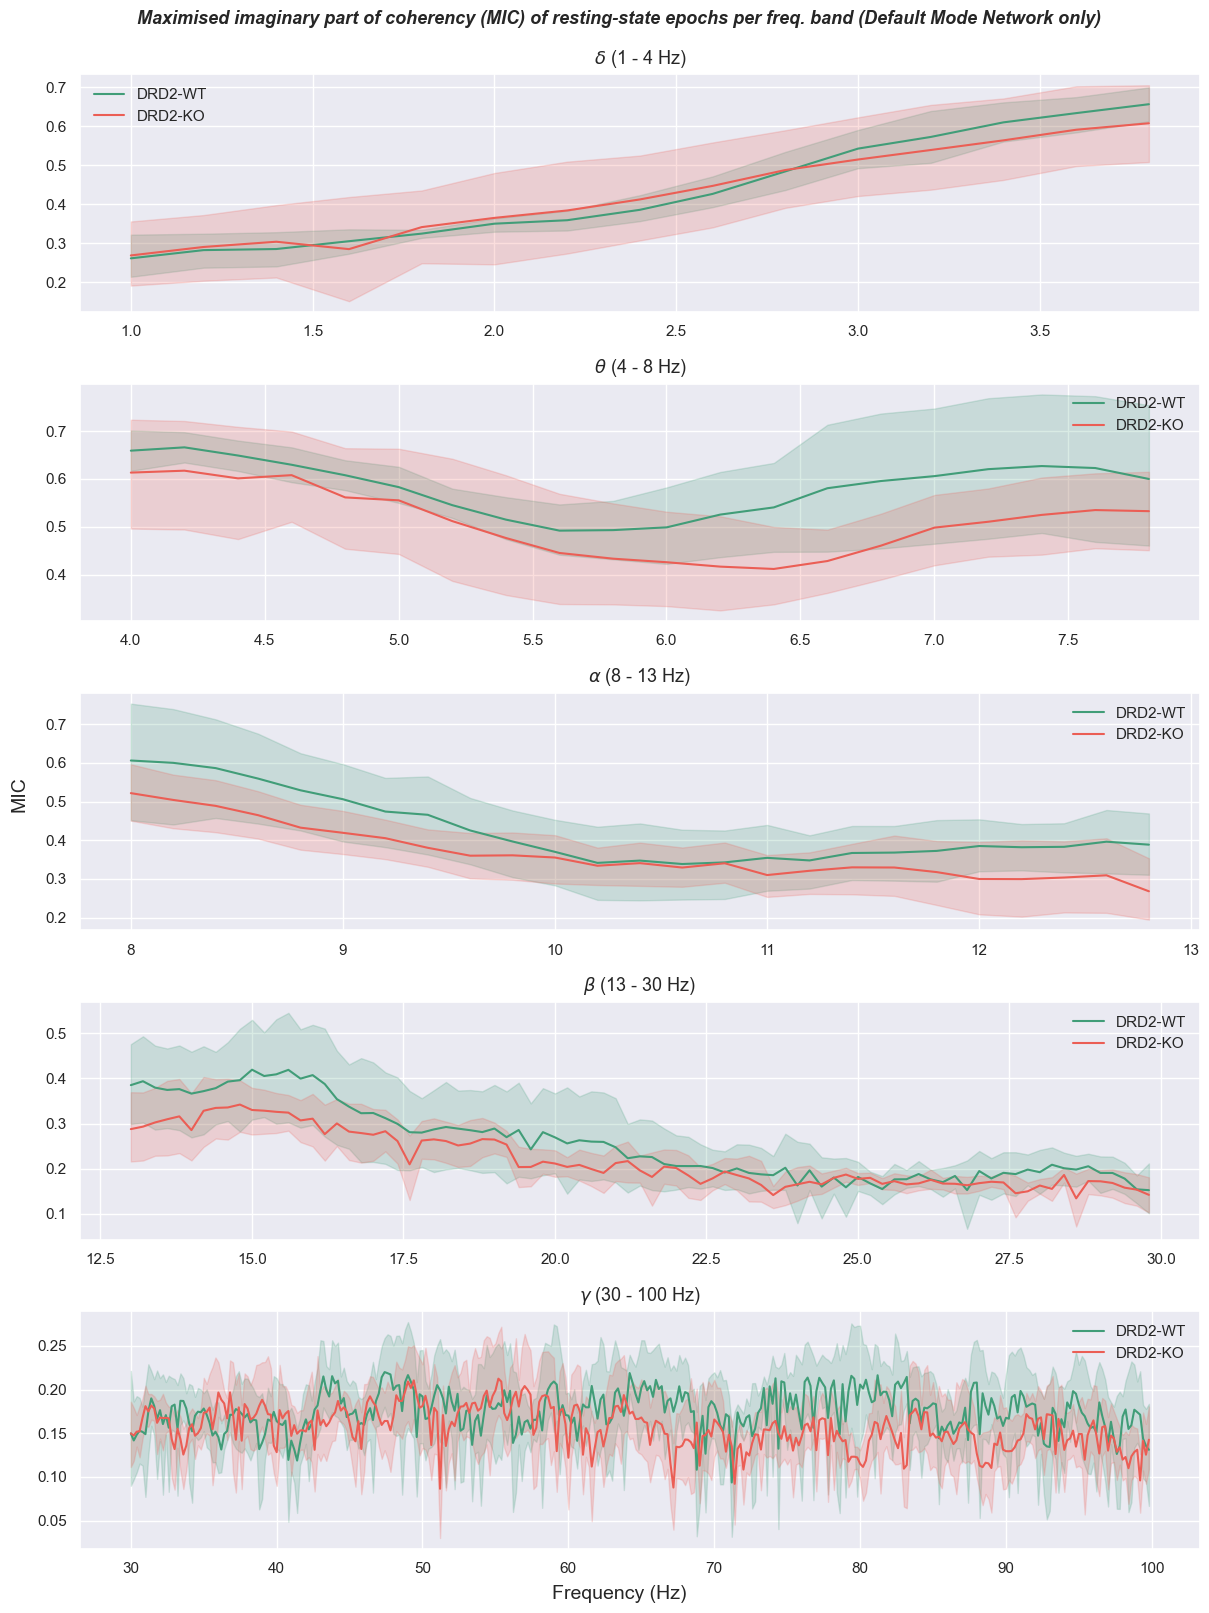

In [47]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 16))
axs = axs.ravel()

for i, (band, (start, end)) in enumerate(freq_bands_eeg.items()):
    rest_data = results_df_dmn[results_df_dmn.state == 'rest']
    slice_data = rest_data[(rest_data.freqs >= start) & (rest_data.freqs <= end)]
    sns.lineplot(x=slice_data.freqs, y=np.abs(slice_data.mic), hue=slice_data.genotype, errorbar=('ci', 95), ax=axs[i], palette=palette_light)
    axs[i].set_title(f"{band} ({start} - {end} Hz)", fontsize=13, y=1.01)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'MIC', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle('Maximised imaginary part of coherency (MIC) of resting-state epochs per freq. band (Default Mode Network only)', fontsize=13, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/MIC_DMN_per_band.pdf"))

### Multivariate Interaction Measure (MIM)

Let's quickly compare the different states

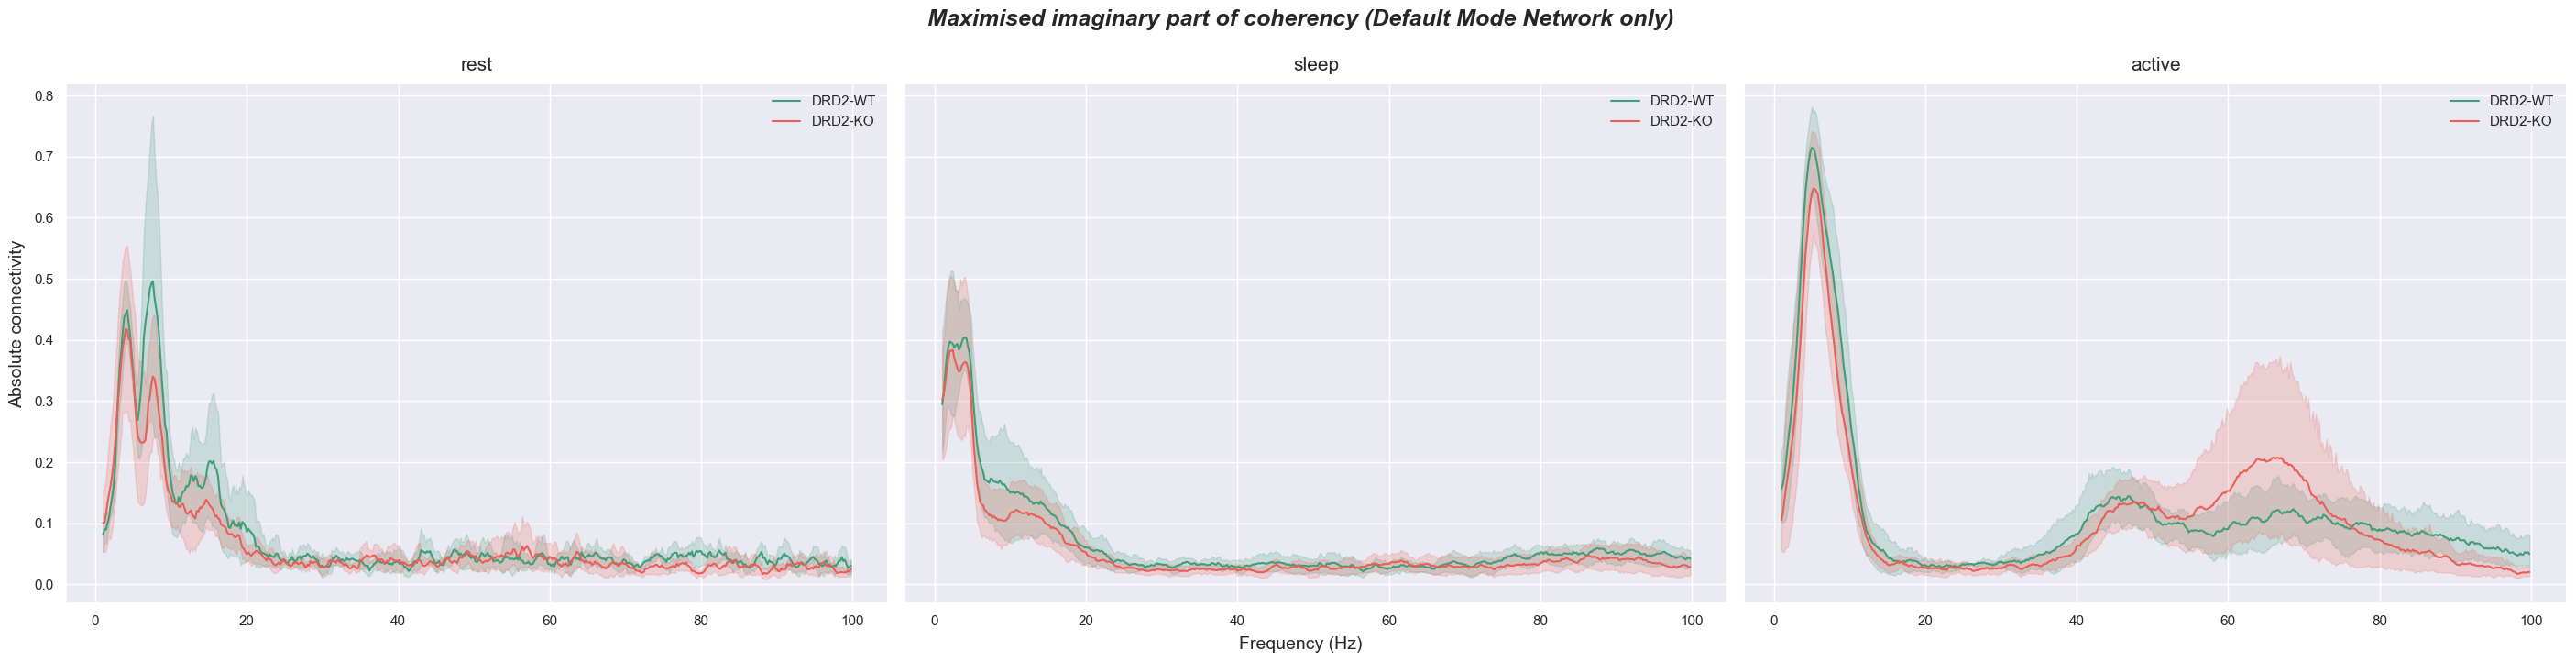

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(28, 7), sharey=True, sharex=True)
axs = axs.ravel()

for i, state in enumerate(results_df_dmn.state.unique()):
    state_data = results_df_dmn[results_df_dmn.state == state]
    
    sns.lineplot(state_data, x='freqs', y='mim', hue='genotype', errorbar=('ci', 95), ax=axs[i], palette=palette_light)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(state, fontsize=15, y=1.01)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'Absolute connectivity', ha='center', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Maximised imaginary part of coherency (Default Mode Network only)", fontsize=18, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/MIM_DMN_per_behaviour.pdf"))

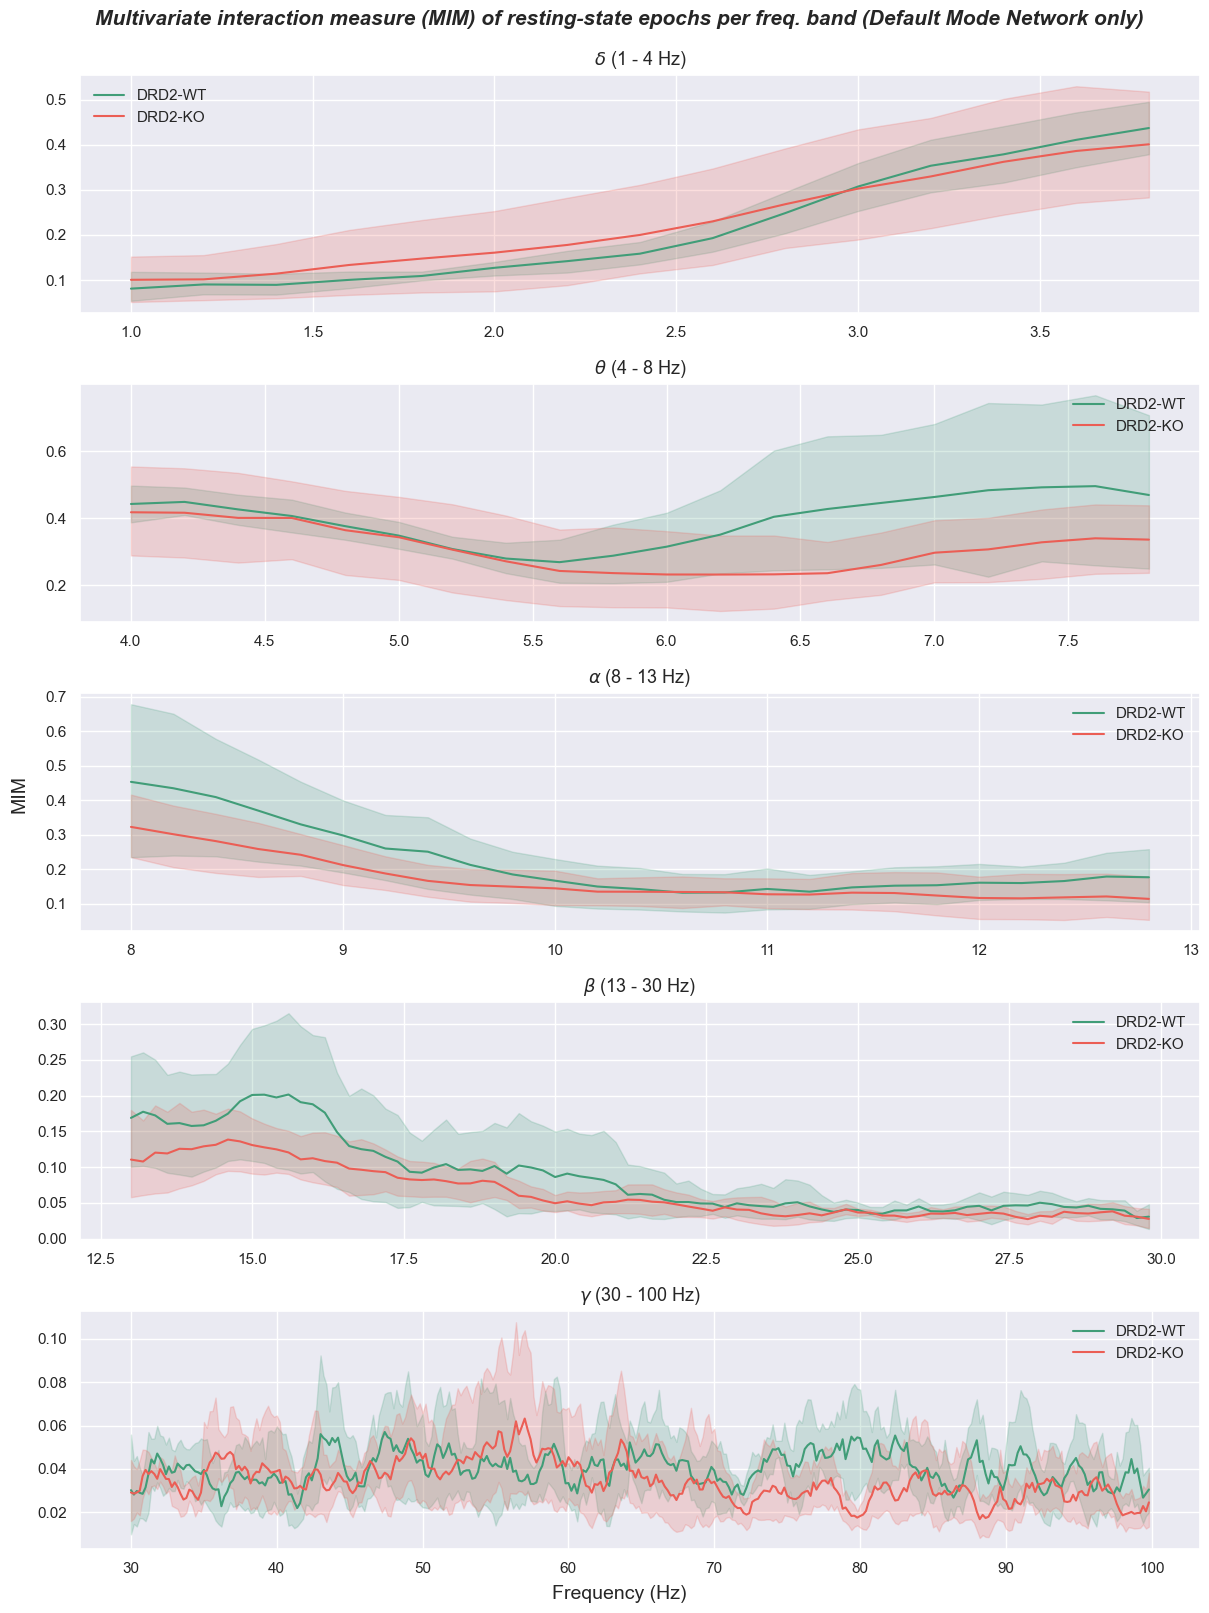

In [49]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 16))
axs = axs.ravel()

for i, (band, (start, end)) in enumerate(freq_bands_eeg.items()):
    rest_data = results_df_dmn[results_df_dmn.state == 'rest']
    slice_data = rest_data[(rest_data.freqs >= start) & (rest_data.freqs <= end)]
    sns.lineplot(slice_data, x='freqs', y='mim', hue='genotype', errorbar=('ci', 95), ax=axs[i], palette=palette_light)
    axs[i].set_title(f"{band} ({start} - {end} Hz)", fontsize=13, y=1.01)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].legend(frameon=False)

fig.text(0.5, 0, 'Frequency (Hz)', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'MIM', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle('Multivariate interaction measure (MIM) of resting-state epochs per freq. band (Default Mode Network only)', fontsize=15, fontweight='bold', fontstyle='italic', y=0.99)
plt.tight_layout()
save_figure(os.path.join(plot_folder, f"connectivity/multivariate/MIM_DMN_per_band.pdf"))